In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [23]:
df = pd.read_csv('C3_data.csv', header=0)
df.head(10)

,T,sigma
0,300,1.350000e-07
1,400,1.270000e-05
2,500,1.860000e-04
3,600,1.200000e-03
4,700,6.950000e-03
5,800,4.390000e-02
6,900,2.090000e-01
7,1000,9.370000e-01
8,1100,2.970000e+00


In [24]:
df['1/T'] = 1 / df['T']
df['ln(sigma*T)'] = np.log(df[' sigma']*df['T'])
df.head(10)

,T,sigma,1/T,ln(sigma*T)
0,300,1.350000e-07,0.003333,-10.114209
1,400,1.270000e-05,0.002500,-5.282444
2,500,1.860000e-04,0.002000,-2.375156
3,600,1.200000e-03,0.001667,-0.328504
4,700,6.950000e-03,0.001429,1.582067
5,800,4.390000e-02,0.001250,3.558771
6,900,2.090000e-01,0.001111,5.236974
7,1000,9.370000e-01,0.001000,6.842683
8,1100,2.970000e+00,0.000909,8.091627


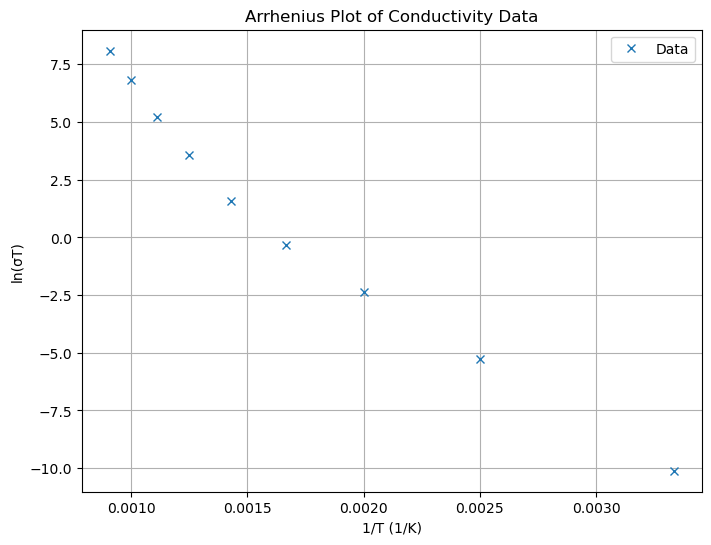

In [25]:
plt.figure(figsize=(8,6))
plt.plot(df['1/T'], df['ln(sigma*T)'], 'x', label='Data')
plt.xlabel('1/T (1/K)')
plt.ylabel('ln(σT)')
plt.title('Arrhenius Plot of Conductivity Data')
plt.legend()
plt.grid()
plt.show()

In [26]:
N = 3

x = df['1/T'].values
y = df['ln(sigma*T)'].values

def linear_model(x, m, c):
    return m * x + c

x_start = x[:N]
y_start = y[:N]

x_end = x[-N:]
y_end = y[-N:]

popt_start, _ = curve_fit(linear_model, x_start, y_start)
m_start, c_start = popt_start

popt_end, _ = curve_fit(linear_model, x_end, y_end)
m_end, c_end = popt_end

x_fit_start = np.linspace(x_start.min(), x_start.max(), 100)
y_fit_start = linear_model(x_fit_start, m_start, c_start)

x_fit_end = np.linspace(x_end.min(), x_end.max(), 100)
y_fit_end = linear_model(x_fit_end, m_end, c_end)

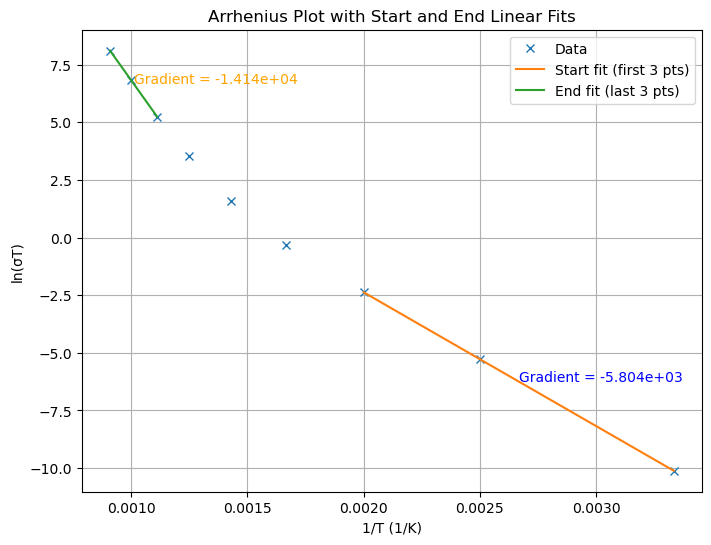

In [27]:
plt.figure(figsize=(8,6))
plt.plot(x, y, 'x', label='Data')
plt.plot(x_fit_start, y_fit_start, '-', label=f'Start fit (first {N} pts)')
plt.plot(x_fit_end, y_fit_end, '-', label=f'End fit (last {N} pts)')

x_pos_start = x_fit_start.mean()
y_pos_start = linear_model(x_pos_start, m_start, c_start)

x_pos_end = x_fit_end.mean()
y_pos_end = linear_model(x_pos_end, m_end, c_end)

plt.text(x_pos_start, y_pos_start,
         f"Gradient = {m_start:.3e}",
         fontsize=10, color='blue')

plt.text(x_pos_end, y_pos_end,
         f"Gradient = {m_end:.3e}",
         fontsize=10, color='orange')

plt.xlabel('1/T (1/K)')
plt.ylabel('ln(σT)')
plt.title('Arrhenius Plot with Start and End Linear Fits')
plt.legend()
plt.grid()
plt.show()